In [ ]:
! pip install opendatasets

# Load datasets from Kaggle

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/adityajn105/flickr8k")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mazenatefmohamed
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/adityajn105/flickr8k


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from collections import defaultdict

captions_path = '/content/flickr8k/captions.txt'
images_dir = '/content/flickr8k/Images'

# Read the captions file
with open(captions_path, 'r') as f:
    captions = f.readlines()

# Remove the header line
captions = captions[1:]

In [ ]:
# Function 1: Build a dictionary {image_name: [list of 5 captions]}

def build_image_caption_map(captions):
    image_caption_map = defaultdict(list)
    for line in captions:
        image_name, caption = line.strip().split(',', 1)
        # Add the caption to the corresponding image name
        image_caption_map[image_name].append(caption)
    print("number of image: ",len(image_caption_map))
    return image_caption_map

In [ ]:
# Function 2: Display the image and its 5 captions based on the index

def show_image_and_captions_by_index(image_caption_map, index):
    image_names = list(image_caption_map.keys())
    if index >= len(image_names):
        print("Index is out of range.")
        return

    image_name = image_names[index]
    captions = image_caption_map[image_name]

    # Load the image
    image_path = os.path.join(images_dir, image_name)
    img = cv2.imread(image_path)
    if img is None:
        print(f"Image {image_name} not found!")
        return

    # Convert BGR image to RGB for correct display
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(7, 5))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Image: {image_name}', fontsize=12)
    plt.show()

    # Print the 5 captions for this image
    print("Captions:")
    for i, cap in enumerate(captions):
        print(f"{i+1}. {cap}")


In [ ]:
# Build the image-caption map
image_caption_map = build_image_caption_map(captions)

number of image:  8091


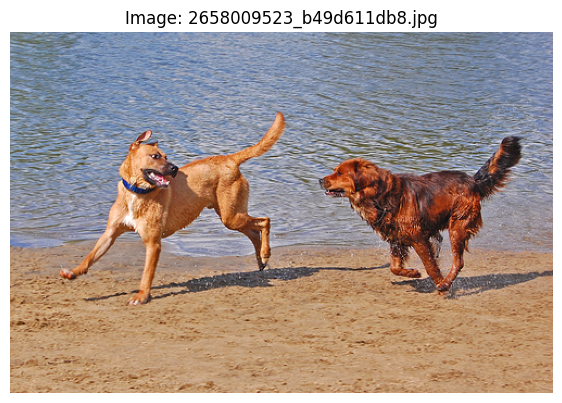

Captions:
1. A brown dog and a red dog frolicking on the waters edge on the beach .
2. two brown dogs are running on the beach beside the ocean .
3. Two brown dogs chase and playfully fight with each other on the sandy beach .
4. Two brown dogs play on the sand by the water .
5. Two dogs running down a beach .


In [ ]:
# Display the first image and its 5 captions
show_image_and_captions_by_index(image_caption_map, 2566)


In [ ]:
import string
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords') # to stopwords
nltk.download('wordnet')  # to lemmatization

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def preprocess_captions(captions_map, add_tokens=False, do_stemming=False, do_lemmatization=False):

    table = str.maketrans('', '', string.punctuation)

    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    cleaned_map = {}

    for image_id, desc_list in captions_map.items():
        cleaned_map[image_id] = []
        for desc in desc_list:

            # Lowercase
            desc = desc.lower()

            # Remove punctuation
            desc = desc.translate(table)

            # Tokenize
            words = desc.split()

            # Clean words: remove non-alphabetic, short words
            words = [word for word in words if word.isalpha() and len(word) > 1]

            # Optional: Stemming
            if do_stemming:
                words = [stemmer.stem(word) for word in words]

            # Optional: Lemmatization
            if do_lemmatization:
                words = [lemmatizer.lemmatize(word) for word in words]

            # Optional: Remove stopwords (Uncomment if you want it)
            words = [word for word in words if word not in stop_words]

            # Reconstruct the cleaned caption
            desc = ' '.join(words)

            # Optional: Add startseq and endseq tokens
            if add_tokens:
                desc = 'startseq ' + desc + ' endseq'

            cleaned_map[image_id].append(desc)

    return cleaned_map


In [ ]:
# preprocessing
cleaned_image_caption_map = preprocess_captions(
    captions_map=image_caption_map,
    add_tokens=True,
    do_stemming=False,
    do_lemmatization=True
)


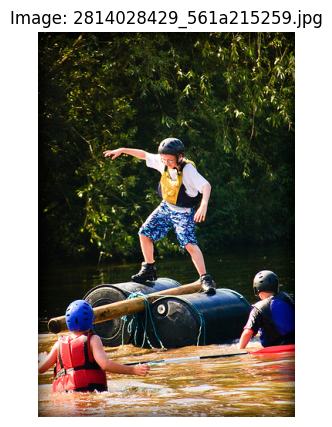

Captions:
1. A boy balances on something inflatable
2. A boy tries to keep his balance while standing on two floating devices while two others watch .
3. A kid wearing safety gear stands on some material in the water .
4. Little kids play in the water while their friend poses on top of their raft .
5. There are two children in the water and one balancing on a float and they are all wearing helmets .


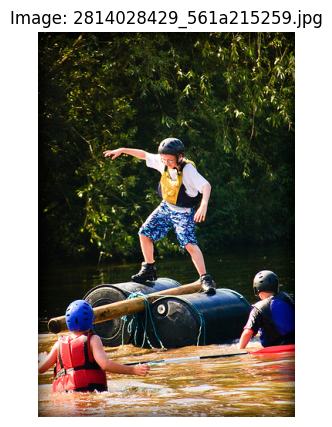

Captions:
1. startseq boy balance something inflatable endseq
2. startseq boy try keep balance standing two floating device two others watch endseq
3. startseq kid wearing safety gear stand material water endseq
4. startseq little kid play water friend pose top raft endseq
5. startseq two child water one balancing float wearing helmet endseq


In [ ]:
show_image_and_captions_by_index(image_caption_map, 2999)

# Display the image after cleated the captions
show_image_and_captions_by_index(cleaned_image_caption_map, 2999)


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def generate_wordcloud(captions_map,tittle):
    # Combine all captions into one large text
    all_captions = " ".join([" ".join(desc_list) for desc_list in captions_map.values()])

    # Generate the word cloud
    wordcloud = WordCloud(
        width=1000,
        height=400,
        background_color="black",
        stopwords=STOPWORDS,  # Use default stopwords from WordCloud
        colormap="twilight_shifted_r"  # You can change the color map if you want
    ).generate(all_captions)

    # Plot the Word Cloud
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")  # Hide axes
    plt.title(tittle, fontsize=20)
    plt.show()

    # Save the wordcloud image
    # wordcloud.to_file('/content/wordcloud.png')



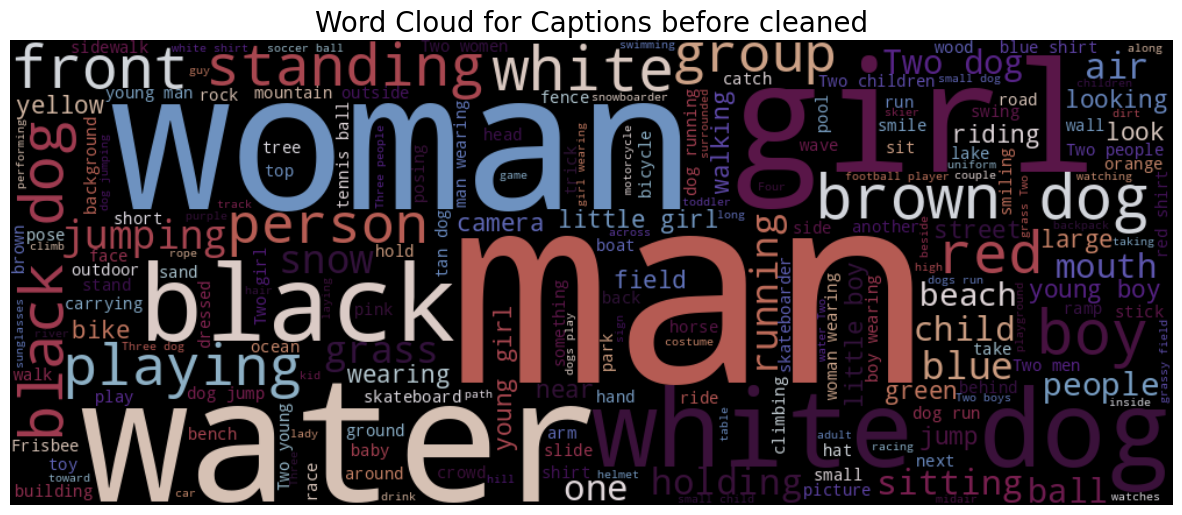

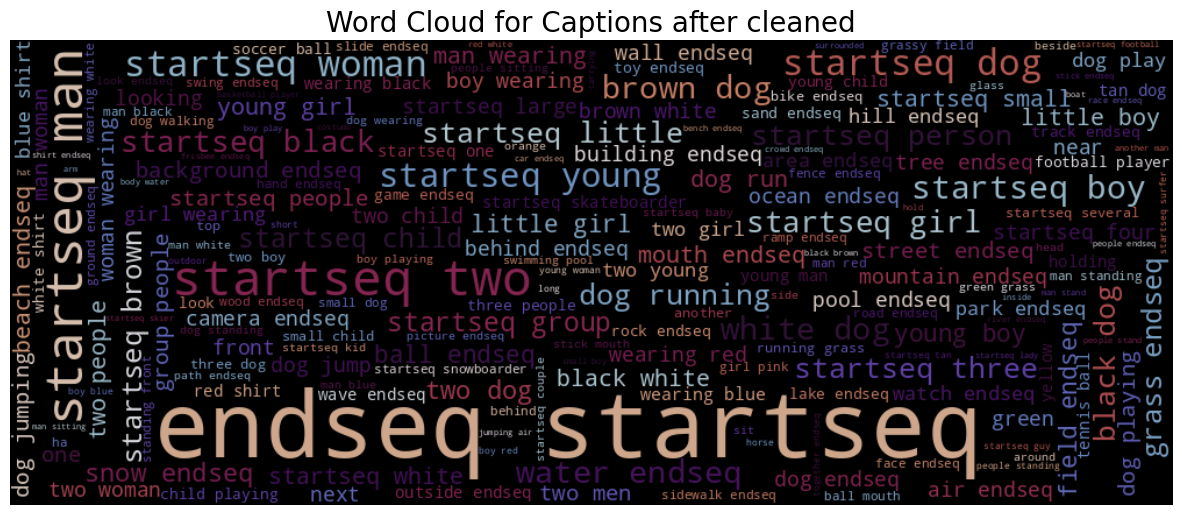

In [ ]:
# Call the function and pass your cleaned map
generate_wordcloud(image_caption_map,"Word Cloud for Captions before cleaned")

generate_wordcloud(cleaned_image_caption_map,"Word Cloud for Captions after cleaned")


In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

def plot_top_words_from_map(captions_map, top_n=20, tittle=""):
    # Collect all words from the captions map
    all_words = []
    for desc_list in captions_map.values():
        for caption in desc_list:
            all_words.extend(caption.split())

    # Count the frequency of each word
    word_freq = Counter(all_words)
    common_words = word_freq.most_common(top_n)
    words, counts = zip(*common_words)

    # Plot the bar chart for the most frequent words
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color='purple')
    plt.xticks(rotation=45)
    plt.title(tittle)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.show()


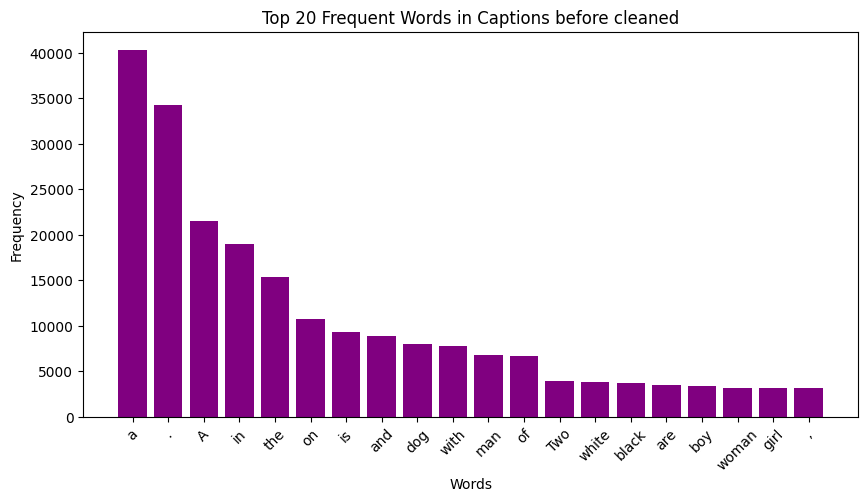

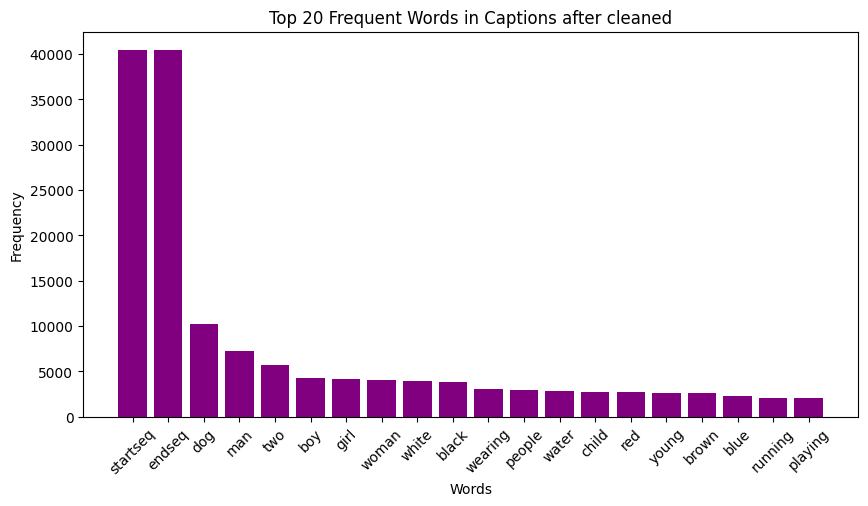

In [ ]:
plot_top_words_from_map(image_caption_map,20,"Top 20 Frequent Words in Captions before cleaned")
plot_top_words_from_map(cleaned_image_caption_map,20,"Top 20 Frequent Words in Captions after cleaned")


In [ ]:
def plot_caption_length_distribution_from_map(captions_map,tittle):
    # Calculate the number of words in each caption
    caption_lengths = []
    for desc_list in captions_map.values():
        for caption in desc_list:
            caption_lengths.append(len(caption.split()))

    # Plot the histogram of caption lengths
    plt.figure(figsize=(8,4 ))
    plt.hist(caption_lengths, bins=20, color='purple',edgecolor='black')
    plt.title(tittle)
    plt.xlabel("Number of Words per Caption")
    plt.ylabel("Number of Captions")
    plt.show()


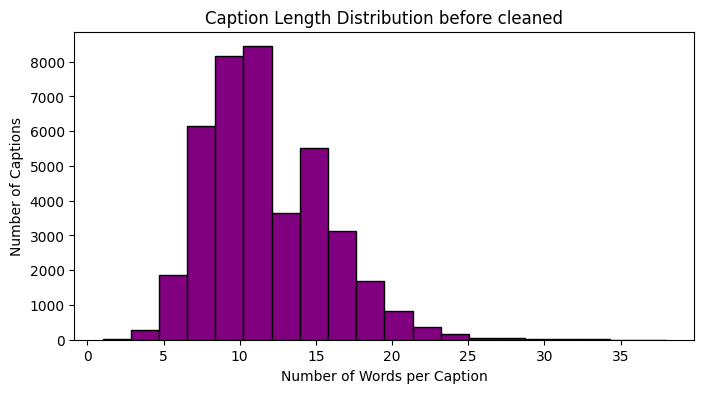

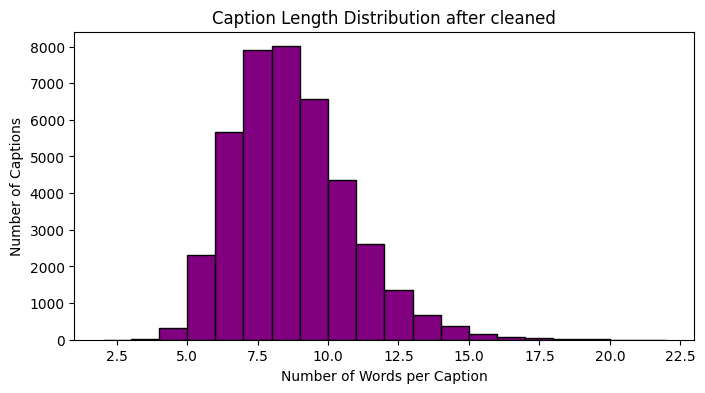

In [ ]:
plot_caption_length_distribution_from_map(image_caption_map,"Caption Length Distribution before cleaned")

plot_caption_length_distribution_from_map(cleaned_image_caption_map,"Caption Length Distribution after cleaned")


In [ ]:
def plot_vocab_unique_vs_repeated_from_map(captions_map,tittle):
    # Collect all words from the captions map
    all_words = []
    for desc_list in captions_map.values():
        for caption in desc_list:
            all_words.extend(caption.split())

    # Count the frequency of each word
    word_freq = Counter(all_words)
    unique = sum(1 for word in word_freq if word_freq[word] == 1)
    repeated = len(word_freq) - unique

    # Plot the pie chart for unique vs repeated words
    plt.figure(figsize=(5, 5))
    plt.pie(
        [unique, repeated],
        labels=['Unique Words', 'Repeated Words'],
        autopct='%1.1f%%',
        colors=['purple', 'Lavender', 'mediumpurple', 'gold']
    )
    plt.title(tittle)
    plt.show()


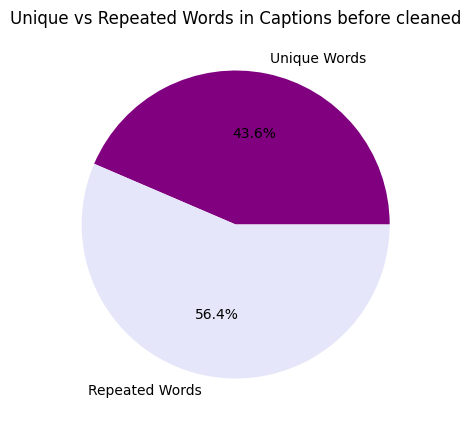

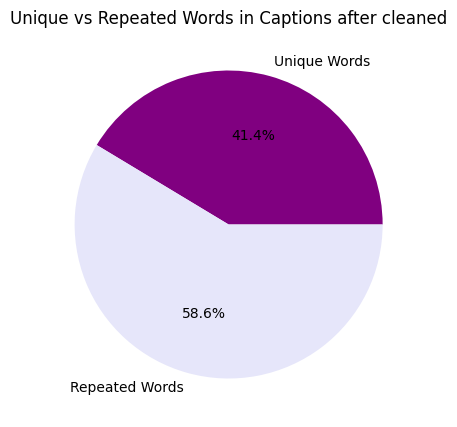

In [ ]:
plot_vocab_unique_vs_repeated_from_map(image_caption_map,"Unique vs Repeated Words in Captions before cleaned")
plot_vocab_unique_vs_repeated_from_map(cleaned_image_caption_map,"Unique vs Repeated Words in Captions after cleaned")


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def captions_to_sequences(captions_map, max_length=None):
    """
    Converts individual captions into padded sequences ready for LSTM or Seq2Seq models.

    Args:
        captions_map (dict): A dictionary where keys are image IDs and values are lists of captions.
        max_length (int, optional): The maximum sequence length after padding. Defaults to None.

    Returns:
        tokenizer: The fitted tokenizer object.
        padded_sequences: Numpy array of padded sequences (one sequence per caption).
        image_ids: List of image IDs corresponding to each caption (optional use for multi-input models).
    """
    all_captions = []  # To collect all individual captions
    image_ids = []     # To track which caption belongs to which image (optional)

    # Iterate through the map to collect all captions separately
    for image_id, desc_list in captions_map.items():
        for caption in desc_list:
            all_captions.append(caption)
            image_ids.append(image_id)

    # Initialize and fit the tokenizer on all captions
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(all_captions)

    # Convert each caption to a sequence of integers
    sequences = tokenizer.texts_to_sequences(all_captions)

    # Pad the sequences to ensure uniform length
    padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

    return tokenizer, padded_sequences, image_ids


In [ ]:
tokenizer, sequences, image_ids = captions_to_sequences(cleaned_image_caption_map, max_length=20)

print("Tokenizer Word Index:\n", tokenizer.word_index)


# Create a dictionary mapping image_id -> list of sequences
image_sequences_map = {}

for img_id, seq in zip(image_ids, sequences):
    if img_id not in image_sequences_map:
        image_sequences_map[img_id] = []
    image_sequences_map[img_id].append(seq)

# Print sequences for image ID

first_image_id = list(image_sequences_map.keys())[1]
print(f"\nSequences for Image ID '{first_image_id}':")

for seq in image_sequences_map[first_image_id]:
    print(seq)  # Each sequence printed on a separate line



Tokenizer Word Index:
 {'startseq': 1, 'endseq': 2, 'dog': 3, 'man': 4, 'two': 5, 'boy': 6, 'girl': 7, 'woman': 8, 'white': 9, 'black': 10, 'wearing': 11, 'people': 12, 'water': 13, 'child': 14, 'red': 15, 'young': 16, 'brown': 17, 'blue': 18, 'running': 19, 'playing': 20, 'shirt': 21, 'ball': 22, 'standing': 23, 'little': 24, 'grass': 25, 'person': 26, 'snow': 27, 'jumping': 28, 'stand': 29, 'front': 30, 'three': 31, 'jump': 32, 'sitting': 33, 'holding': 34, 'run': 35, 'field': 36, 'small': 37, 'play': 38, 'large': 39, 'green': 40, 'group': 41, 'one': 42, 'yellow': 43, 'walking': 44, 'men': 45, 'air': 46, 'beach': 47, 'mouth': 48, 'near': 49, 'player': 50, 'rock': 51, 'street': 52, 'another': 53, 'bike': 54, 'riding': 55, 'walk': 56, 'outside': 57, 'look': 58, 'hat': 59, 'mountain': 60, 'next': 61, 'jacket': 62, 'looking': 63, 'orange': 64, 'pink': 65, 'ride': 66, 'camera': 67, 'pool': 68, 'tree': 69, 'around': 70, 'behind': 71, 'toy': 72, 'background': 73, 'dirt': 74, 'hand': 75, 'bu

In [ ]:
import numpy as np
import os
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import pickle

def extract_and_save_image_features(image_folder, save_path):
    """
    Extract features from images using ResNet50 and save them to Google Drive.

    :param image_folder: Path to the folder containing images
    :param save_path: Path to save the extracted features (.npy or .pkl)
    """

    # Load pre-trained ResNet50 model without the top layer (for feature extraction)
    base_model = EfficientNetB0(weights='imagenet', include_top=False, pooling='avg')

    # Dictionary to hold image_id -> features
    image_features = {}

    # Iterate over images in the folder
    for img_file in os.listdir(image_folder):
        if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(image_folder, img_file)
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)

            # Extract features
            features = base_model.predict(img_array, verbose=0)
            image_id = os.path.splitext(img_file)[0]  # Use image file name without extension as ID
            image_features[image_id] = features.flatten()

    # Save features as .pkl file on Drive
    with open(save_path, 'wb') as f:
        pickle.dump(image_features, f)

    print(f"Features extracted and saved at: {save_path}")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

image_folder = images_dir
# save_path = '/content/drive/MyDrive/DEPI_Project/image_features_EfficientNetB0.pkl'

# extract_and_save_image_features(image_folder, save_path)


Mounted at /content/drive


In [ ]:
with open('/content/drive/MyDrive/DEPI_Project/image_features_ResNet50.pkl', 'rb') as f:
    image_features = pickle.load(f)

print(f"Loaded {len(image_features)} image features.")


Loaded 8091 image features.


In [ ]:

for idx, (image_id, features) in enumerate(image_features.items()):
    print(f"Image ID: {image_id}")
    print(f"Features value : {features}\n")

    if idx == 1:
        break

Image ID: 1606988704_fe330878a3
Features value : [0.01127699 0.45437232 0.3080599  ... 0.04539275 0.48421833 0.07845464]

Image ID: 3336361161_c06cdd160e
Features value : [0.5710455  0.21032135 0.2869483  ... 0.9045672  0.43019232 0.17785314]



In [ ]:
with open('/content/drive/MyDrive/DEPI_Project/image_features_EfficientNetB0.pkl', 'rb') as f:
    image_features = pickle.load(f)

print(f"Loaded {len(image_features)} image features.")


Loaded 8091 image features.


In [ ]:

for idx, (image_id, features) in enumerate(image_features.items()):
    print(f"Image ID: {image_id}")
    print(f"Features value : {features}\n")

    if idx == 1:
        break

Image ID: 1606988704_fe330878a3
Features value : [ 0.60036343 -0.11185885  0.3045507  ...  0.06177424 -0.0079049
  0.06117819]

Image ID: 3336361161_c06cdd160e
Features value : [ 0.05153955  0.02531523 -0.17901315 ... -0.02084883 -0.07027645
  0.00145324]

